In [43]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import math, gillespy2
from gillespy2.solvers.cpp.ssa_c_solver import SSACSolver

Using matplotlib backend: TkAgg


In [132]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=4e3) # low = 4e3; mid = 2e4; high = 1e7
        
        A_ = gillespy2.Species(name='A_', initial_value=6e9) # A = Sa/(k2*S+MuA)
        
        H1 = gillespy2.Species(name='H1', initial_value=0)
        H2 = gillespy2.Species(name='H2', initial_value=0)
        H3 = gillespy2.Species(name='H3', initial_value=0)
        H4 = gillespy2.Species(name='H4', initial_value=0)
        H5 = gillespy2.Species(name='H5', initial_value=0)
        H6 = gillespy2.Species(name='H6', initial_value=0)
        
        HLN1 = gillespy2.Species(name='HLN1', initial_value=0)
        HLN2 = gillespy2.Species(name='HLN2', initial_value=0)
        HLN3 = gillespy2.Species(name='HLN3', initial_value=0)
        HLN4 = gillespy2.Species(name='HLN4', initial_value=0)
        HLN5 = gillespy2.Species(name='HLN5', initial_value=0)
        HLN6 = gillespy2.Species(name='HLN6', initial_value=0)
        
        self.add_species([S_,A_,H1,H2,H3,H4,H5,H6,HLN1,HLN2,HLN3,HLN4,HLN5,HLN6])
        
        # parameters
        # num(spores) per macrophage
        ns = gillespy2.Parameter(name='ns', expression=3) # avg = 3.38
        
        # rate of phagocytosis
        k2 = gillespy2.Parameter(name='k2', expression=1e-10)
        
        # migration to TMLN
        k3 = gillespy2.Parameter(name='k3', expression=0.05)

        # source of macrophages per hour
        Sa = gillespy2.Parameter(name='Sa', expression=3e8)
        
        # decay rate of macrophages
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        
        self.add_parameter([ns,k2,k3,Sa,MuA])
        
        # reactions
        # is there a way to define propensity fx in terms of a var?
        R1 = gillespy2.Reaction(
            name='R1',
            reactants={S_:1, A_:1},
            products={H1:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R2 = gillespy2.Reaction(
            name='R2',
            reactants={S_:1, A_:1},
            products={H2:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R3 = gillespy2.Reaction(
            name='R3',
            reactants={S_:1, A_:1},
            products={H3:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R4 = gillespy2.Reaction(
            name='R4',
            reactants={S_:1, A_:1},
            products={H4:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R5 = gillespy2.Reaction(
            name='R5',
            reactants={S_:1, A_:1},
            products={H5:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R6 = gillespy2.Reaction(
            name='R6',
            reactants={S_:1, A_:1},
            products={H6:1},
            propensity_function="(k2*S_*(Sa/(k2*S_ + MuA)))/ns"
        )
        
        R7 = gillespy2.Reaction(
            name='R7',
            reactants={H1:1},
            products={HLN1:1},
            rate=k3
        )
        
        R8 = gillespy2.Reaction(
            name='R8',
            reactants={H2:1},
            products={HLN2:1},
            rate=k3
        )
        
        R9 = gillespy2.Reaction(
            name='R9',
            reactants={H3:1},
            products={HLN3:1},
            rate=k3
        )
        
        R10 = gillespy2.Reaction(
            name='R10',
            reactants={H4:1},
            products={HLN4:1},
            rate=k3
        )
        
        R11 = gillespy2.Reaction(
            name='R11',
            reactants={H5:1},
            products={HLN5:1},
            rate=k3
        )
        
        R12 = gillespy2.Reaction(
            name='R12',
            reactants={H6:1},
            products={HLN6:1},
            rate=k3
        )
                
        self.add_reaction([R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12])
        t = numpy.linspace(0,20,401)
        self.timespan(t)
        #print(t)

In [133]:
model = DayModel()

In [134]:
%time results = model.run(solver=SSACSolver)

BuildError: Error encountered while compiling file:
Return code: 2.
Error:
b'UserSimulation.cpp:20:75: error: narrowing conversion of \xe2\x80\x986000000000\xe2\x80\x99 from \xe2\x80\x98long int\xe2\x80\x99 to \xe2\x80\x98uint {aka unsigned int}\xe2\x80\x99 inside { } [-Wnarrowing]\n uint populations[] = {4000, 6000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0};\n                                                                           ^\nmake: *** [UserSimulation] Error 1\n'


Initial spores: 4000.0
Spores remaining: 0.0
Spores at 5 hours: 8.0


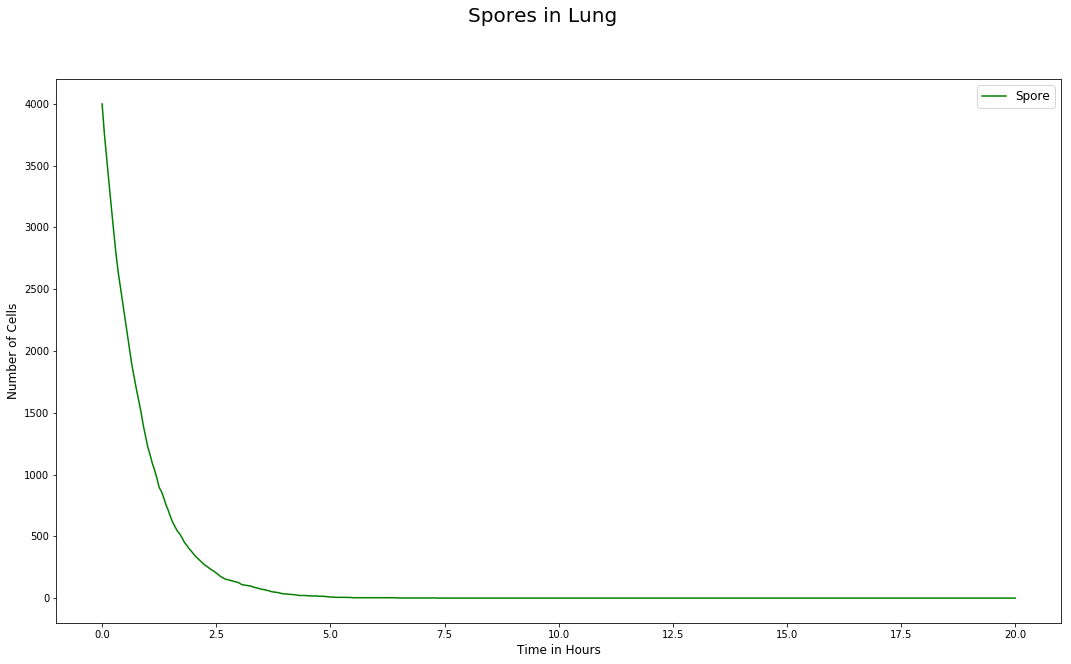

In [135]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Spores in Lung", fontsize=20)

plt.plot(results[0]['time'], results[0]['S_'], 'g-', label='Spore')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)

print("Initial spores: {}".format(results[0]['S_'][0]))
print("Spores remaining: {}".format(results[0]['S_'][-1]))

print("Spores at 5 hours: {}".format(results[0]['S_'][100]))


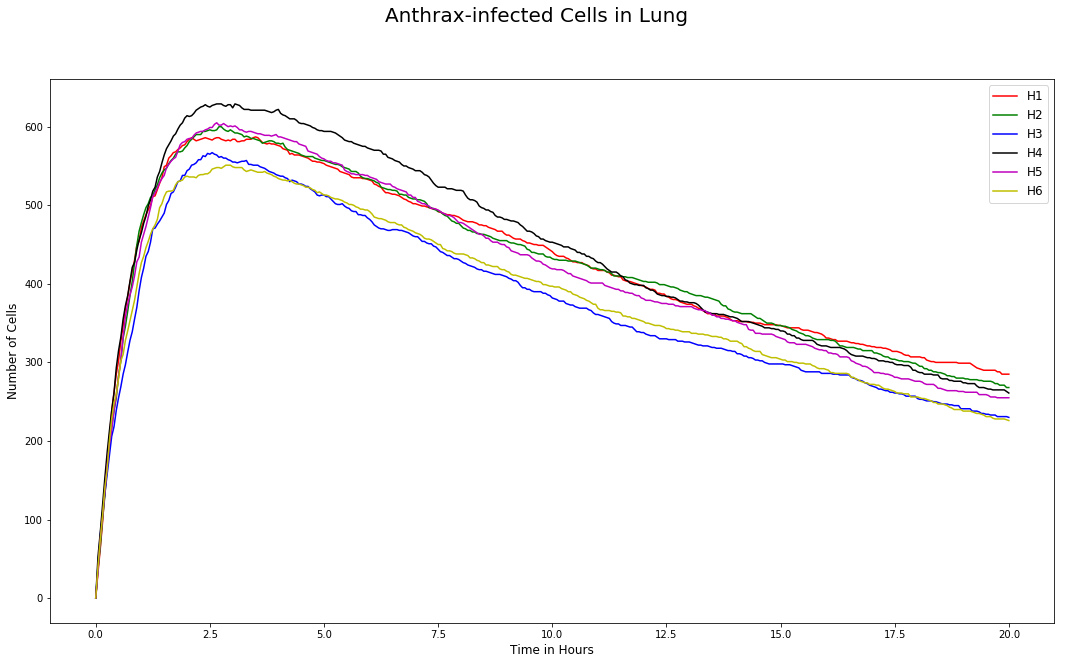

In [136]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Anthrax-infected Cells in Lung", fontsize=20)

#plt.plot(results[0]['time'], results[0]['S_'], 'g-', label='Spore')
plt.plot(results[0]['time'], results[0]['H1'], 'r-', label='H1')
plt.plot(results[0]['time'], results[0]['H2'], 'g-', label='H2')
plt.plot(results[0]['time'], results[0]['H3'], 'b-', label='H3')
plt.plot(results[0]['time'], results[0]['H4'], 'k-', label='H4')
plt.plot(results[0]['time'], results[0]['H5'], 'm-', label='H5')
plt.plot(results[0]['time'], results[0]['H6'], 'y-', label='H6')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)

#print(results[0]['H1'][-1])




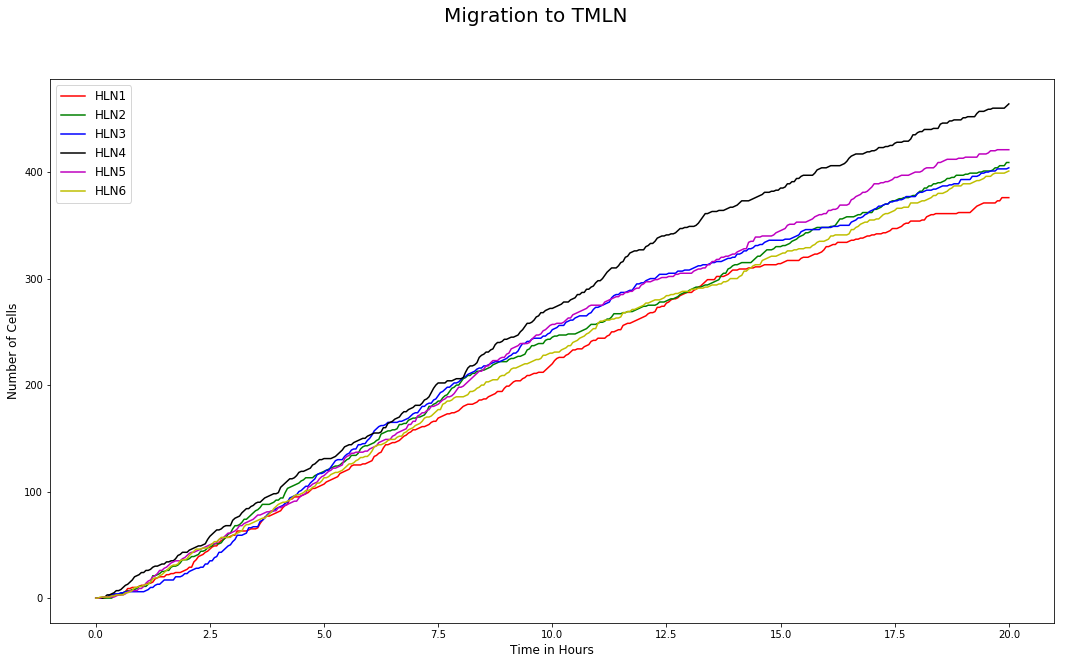

In [128]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Migration to TMLN", fontsize=20)

#plt.plot(results[0]['time'], results[0]['S_'], 'b', label='Spores')
plt.plot(results[0]['time'], results[0]['HLN1'], 'r-', label='HLN1')
plt.plot(results[0]['time'], results[0]['HLN2'], 'g-', label='HLN2')
plt.plot(results[0]['time'], results[0]['HLN3'], 'b-', label='HLN3')
plt.plot(results[0]['time'], results[0]['HLN4'], 'k-', label='HLN4')
plt.plot(results[0]['time'], results[0]['HLN5'], 'm-', label='HLN5')
plt.plot(results[0]['time'], results[0]['HLN6'], 'y-', label='HLN6')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)
